In [1]:
## Nipype Workflow for Erin's DTI Data
### Convert RAW DICOM data to NIFTI Image Data set
import os, sys
from os.path import join as oj
from glob import glob

In [2]:
import nipype.pipeline.engine as pe
import nipype.interfaces.utility as util
import nipype.interfaces.io as nio
import nipype.interfaces.fsl as fsl

In [3]:
### This scripts assumes all of the RAW data has already been converted to NIFTI and is dumped into 
### A Single directory for each subject...
StoutHaberNIIData = '/FEATURES/NiPypeWorkingData/StoutHaber/NII_Data_Complete/'
NiPypeOutputDir = '/FEATURES/NiPypeWorkingData/StoutHaber/niPypePreProc_rafi/'
### Add additional PATHS HERE if needed

In [4]:
HomoFaberImageSessions = os.listdir(StoutHaberNIIData)

## LETS BE SMART..
StoutSubjectList = []  ### This contains a list of all the ImageSessions with a Complete Data set
for ss in HomoFaberImageSessions:
    fullSubjDirPath =  oj(StoutHaberNIIData,ss)
    if not os.path.isdir(fullSubjDirPath):
        print "UH OH!!! Directory Missing",fullSubjDirPath
    else:
        StoutSubjectList.append(ss)
print len(StoutSubjectList),"Subjects to process"

49 Subjects to process


In [5]:
### Create the list of Subjects to Process
imageSession_InfoSrc  = pe.Node(util.IdentityInterface(fields=['imageSessionName']),name='imageSession_InfoSrc')
imageSession_InfoSrc.iterables = ('imageSessionName', HomoFaberImageSessions)

StoutDataSourceDict = dict(  
        T1 = [['imageSessionName',          'T1/struc_raw.nii.gz']],
        nodif_PA=[['imageSessionName',      'DTI/preprocess/5B0_PA/nodif_PA.nii.gz']], 
        nodif_PA_bvec=[['imageSessionName', 'DTI/preprocess/5B0_PA/nodif_PA_bvec']],
        nodif_PA_bval=[['imageSessionName', 'DTI/preprocess/5B0_PA/nodif_PA_bval']],
        data_AP=[['imageSessionName',       'DTI/preprocess/AP/data_AP.nii.gz']], 
        data_AP_bval=[['imageSessionName',  'DTI/preprocess/AP/data_AP_bval']],
        data_AP_bvec=[['imageSessionName',  'DTI/preprocess/AP/data_AP_bvec']])

# ## Create a datasource.. this basically helps me find the individual image files and data sets for an image session
# ## a single image directory likely consists of DTI data, T2 images, T1 images, etc, etc
datasource = pe.Node(interface=nio.DataGrabber(infields=['imageSessionName'], outfields=StoutDataSourceDict.keys() ), name='datasource') 
datasource.inputs.base_directory = StoutHaberNIIData
datasource.inputs.template = '%s/%s'
datasource.inputs.sort_filelist = True
datasource.inputs.base_directory = StoutHaberNIIData
datasource.inputs.template_args = StoutDataSourceDict

In [6]:
## split the AP image and get out the B0 images which are the first 7 volumes
splitout_AP_B0_images = pe.Node(interface=fsl.ExtractROI(t_min=0,t_size=7), name='splitout_AP_B0_images' )
average_AP_B0 = pe.Node(fsl.MeanImage(dimension='T'), name='average_AP_B0')
                                                           
# $statement .= " $WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/AP/vol -t ";
# #print "$statement \n";
# $statement  = " fslmaths $WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/AP/vol0000.nii.gz ";
# $statement .= " -add $WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/AP/vol0001.nii.gz ";
# $statement .= " -add $WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/AP/vol0002.nii.gz ";
# $statement .= " -add $WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/AP/vol0003.nii.gz ";
# $statement .= " -add $WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/AP/vol0004.nii.gz ";
# $statement .= " -add $WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/AP/vol0005.nii.gz ";
# $statement .= " -add $WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/AP/vol0006.nii.gz ";
# $statement .= " -div 7 $WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/AP/avg_b0_AP.nii.gz ";
# #print "$statement \n";
                                

In [7]:
# GET API DTI
splitout_AP_DTI=  pe.Node(interface=fsl.ExtractROI(t_min=7,t_size=-1), name='splitout_AP_DTI' )

# # get AP dti
# $x=0;
# $statement  = " fslmerge -t $WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/AP/dti_AP.nii.gz ";
# $statement .= " $WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/AP/vol00" . $vol[$x] . ".nii.gz ";
# for($x=1;$x<=$#vol;$x++)        {
# $statement .= " $WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/AP/vol00" . $vol[$x] . ".nii.gz ";
# #print "$statement \n";

In [8]:
### Process the PA Images as well
average_PA_5B0 = pe.Node(fsl.MeanImage(dimension='T'), name='average_PA_5B0')

# # get PA avg b0
# $statement  = " fslsplit $WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/5B0_PA/nodif_PA.nii.gz ";
# $statement .= " $WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/5B0_PA/vol -t ";
# #print "$statement \n";
# $statement  = " fslmaths $WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/5B0_PA/vol0000.nii.gz ";
# $statement .= " -add $WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/5B0_PA/vol0001.nii.gz ";
# $statement .= " -add $WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/5B0_PA/vol0002.nii.gz ";
# $statement .= " -add $WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/5B0_PA/vol0003.nii.gz ";
# $statement .= " -add $WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/5B0_PA/vol0004.nii.gz ";
# $statement .= " -div 5 $WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/5B0_PA/avg_b0_PA.nii.gz ";
# #print "$statement \n";

In [9]:
# >>> from nipype.interfaces.utility import Merge
# >>> mi = Merge(3)
# >>> mi.inputs.in1 = 1
# >>> mi.inputs.in2 = [2, 5]
# >>> mi.inputs.in3 = 3
# >>> out = mi.run()
# >>> out.outputs.out
make_merged_avg_b0 = pe.Node( util.Merge(2), name='make_merged_avg_b0' )

In [10]:
## Topup apparently requires the AP B0 and PA B0 images to be merged into the same file
# make merged avg b0
merge_avg_b0 = pe.Node( fsl.Merge(dimension='t'), name="merge_avg_b0")
# $statement  = " fslmerge -t $WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/merged_b0_AP-PA.nii.gz ";
# $statement .= " $WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/AP/avg_b0_AP.nii.gz ";
# $statement .= " $WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/5B0_PA/avg_b0_PA.nii.gz ";

trim_merged_avg_b0 = pe.Node( fsl.ExtractROI(x_min=0,x_size=-1,y_min=0,y_size=-1,z_min=0,z_size=110), name='trim_merged_avg_b0')        
# $statement  = " fslroi $WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/AP/dti_AP.nii.gz ";
# $statement .= " $WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/AP/dti_AP_trim.nii.gz ";
# $statement .= " 0 -1 0 -1 0 110 ";
#print "$statement \n"; # topup needs an even # of slice

In [11]:
trim_dti_AP = pe.Node( fsl.ExtractROI(x_min=0,x_size=-1,y_min=0,y_size=-1,z_min=0,z_size=110), name='trim_dti_AP')    
    
# $statement  = " fslroi $WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/AP/dti_AP.nii.gz ";
# $statement .= " $WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/AP/dti_AP_trim.nii.gz ";
# $statement .= " 0 -1 0 -1 0 110 ";
#print "$statement \n"; # topup needs an even # of slices

In [12]:
# # topup unwarping
# # $statement  = " topup ";
# # $statement .= " --imain=$WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/merged_b0_AP-PA_trim.nii.gz ";
# # $statement .= " --datain=$WORKINGDATAPATH/acq_params.txt ";
# # $statement .= " --config=/usr/share/fsl/5.0/etc/flirtsch/b02b0.cnf ";
# # $statement .= " --out=$WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/topup ";
# # $statement .= " --fout=$WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/topup_fieldmap "; # can be used for FEAT
# # $statement .= " --iout=$WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/merged_b0_unwarped.nii.gz ";

# ### BuildTOP UP Node
topup_unwarp = pe.Node( fsl.TOPUP(), name="topup_unwarp")
topup_unwarp.inputs.encoding_file = "/home/ehecht/BIGDATA/Stout_Homo_Faber/WORKINGDATA/acq_params.txt"

In [13]:
#topup expects an array
make_topup_list = pe.Node( util.Merge(1), name='make_topup_list' )
# ### Apply  TOPUP
apply_topup = pe.Node( fsl.ApplyTOPUP(), name="apply_topup")
apply_topup.inputs.method = "jac"
apply_topup.inputs.in_index = [1]
apply_topup.inputs.encoding_file = "/home/ehecht/BIGDATA/Stout_Homo_Faber/WORKINGDATA/acq_params.txt"

# apply_topup.inputs.encoding_file = "/home/ehecht/BIGDATA/Stout_Homo_Faber/WORKINGDATA/acq_params.txt"

# # $statement  = " applytopup ";
# # $statement .= " --method=jac "; # because dti images are only acquired in AP direction; not merging AP+PA
# # $statement .= " --imain=$WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/AP/dti_AP_trim.nii.gz ";
# # $statement .= " --inindex=1 "; # because in the merged_b0_AP-PA file used to drive topup, the AP data is first
# # $statement .= " --datain=$WORKINGDATAPATH/acq_params.txt ";
# # $statement .= " --topup=$WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/topup ";
# # $statement .= " --out=$WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/dti_unwarped.nii.gz ";
# # #print "$statement \n";

In [14]:

# # make data, nodif, and nodif_brain_mask


average_B0_unwarped = pe.Node(fsl.MeanImage(dimension='T'), name='average_B0_unwarped')

bet_nodiff = pe.Node(fsl.BET(), name='bet_nodiff')
bet_nodiff.inputs.frac = 0.3
bet_nodiff.inputs.mask = True
bet_nodiff.inputs.robust = True

# $statement  = " bet $WORKINGDATAPATH/" .$subj[$i] . "/DTI/data/nodif.nii.gz ";
# $statement .= " $WORKINGDATAPATH/" .$subj[$i] . "/DTI/data/nodif_brain ";
# $statement .= " -m -f 0.3 -R";
# #print "$statement \n";

fast_nodiff = pe.Node(fsl.FAST(), name='fast_nodiff')
fast_nodiff.inputs.output_biascorrected = True # -B
fast_nodiff.inputs.segments = True # -g
fast_nodiff.inputs.img_type # -t 2

# $statement  = " fast -B -g -t 2 -o $WORKINGDATAPATH/" . $subj[$i] . "/DTI/data/nodif_brain ";
# $statement .= " $WORKINGDATAPATH/" . $subj[$i] . "/DTI/data/nodif_brain.nii.gz ";
# #print "$statement \n";



# >> from nipype.interfaces import fsl
# >>> from nipype.testing import  example_data
# >>> btr = fsl.BET()
# >>> btr.inputs.in_file = example_data('structural.nii')
# >>> btr.inputs.frac = 0.7
# >>> res = btr.run() 

# $statement  = " fslsplit $WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/merged_b0_unwarped.nii.gz ";
# $statement .= " $WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/merged_b0_unwarped_vol -t ";
# #print "$statement \n";
# $statement  = " fslmaths $WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/merged_b0_unwarped_vol0000 ";
# $statement .= " -add $WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/merged_b0_unwarped_vol0001 ";
# $statement .= " -div 2 $WORKINGDATAPATH/" .$subj[$i] . "/DTI/data/nodif.nii.gz ";
# #print "$statement \n";



# $statement  = " mv $WORKINGDATAPATH/" . $subj[$i] . "/DTI/data/nodif_brain_seg_0.nii.gz ";
# $statement .= " $WORKINGDATAPATH/" . $subj[$i] . "/DTI/data/nodif_brain_GM.nii.gz ";
# #print "$statement \n";
# $statement  = " mv $WORKINGDATAPATH/" . $subj[$i] . "/DTI/data/nodif_brain_seg_1.nii.gz ";
# $statement .= " $WORKINGDATAPATH/" . $subj[$i] . "/DTI/data/nodif_brain_WM.nii.gz ";
# #print "$statement \n";

<undefined>

In [15]:
### Perform registration steps

## BET StrucBrain
bet_struc = pe.Node(fsl.BET(), name='bet_struc')
bet_struc.inputs.frac = 0.3
bet_struc.inputs.mask = True
bet_struc.inputs.robust = True

flirt_strucBrain = pe.Node(fsl.FLIRT(), name="flirt_strucBrain")
flirt_strucBrain.inputs.dof = 12
flirt_strucBrain.inputs.reference = fsl.Info.standard_image('MNI152_T1_1mm_brain.nii.gz')
# $statement  = " flirt -dof 12 -in $WORKINGDATAPATH/" . $subj[$i] . "/T1/struc_brain.nii.gz ";
# $statement .= " -ref $WORKINGDATAPATH/MNI152_T1_1mm_brain.nii.gz ";
# $statement .= " -omat $WORKINGDATAPATH/" . $subj[$i] . "/xfms/struc_12dof_MNI.mat ";

# ## REGISTRATION
fnirt_T1 = pe.Node(fsl.FNIRT(),name="fnirt_T1")
fnirt_T1.inputs.ref_file = fsl.Info.standard_image('MNI152_T1_1mm_brain.nii.gz')
# from nipype.interfaces import fsl
# >>> fnirt_mprage = fsl.FNIRT()
# >>> fnirt_mprage.inputs.in_fwhm = [8, 4, 2, 2]
# >>> fnirt_mprage.inputs.subsampling_scheme = [4, 2, 1, 1] 
# $statement  = " fnirt --in=$WORKINGDATAPATH/" . $subj[$i] . "/T1/struc_raw.nii.gz ";
# $statement .= " --ref=$WORKINGDATAPATH/MNI152_T1_1mm.nii.gz ";
# $statement .= " --aff=$WORKINGDATAPATH/" . $subj[$i] . "/xfms/struc_12dof_MNI.mat ";
# $statement .= " --cout=$WORKINGDATAPATH/" . $subj[$i] . "/xfms/struc_warp_MNI_warpfield.nii.gz ";
# #print "$statement \n";


# >>> from nipype.interfaces import fsl
# >>> from nipype.testing import example_data
# >>> aw = fsl.ApplyWarp()
# >>> aw.inputs.in_file = example_data('structural.nii')
# >>> aw.inputs.ref_file = example_data('mni.nii')
# >>> aw.inputs.field_file = 'my_coefficients_filed.nii' 
# >>> res = aw.run() 

applywarp_strucbrain_to_MNI = pe.Node(fsl.ApplyWarp(),name='applywarp_strucbrain_to_MNI')
applywarp_strucbrain_to_MNI.inputs.ref_file = fsl.Info.standard_image('MNI152_T1_1mm_brain.nii.gz')

## connect to struc_brain




# $statement  = " applywarp --in=$WORKINGDATAPATH/" . $subj[$i] . "/T1/struc_brain.nii.gz ";
# $statement .= " --ref=$WORKINGDATAPATH/MNI152_T1_1mm.nii.gz ";
# $statement .= " --warp=$WORKINGDATAPATH/" . $subj[$i] . "/xfms/struc_warp_MNI_warpfield.nii.gz ";
# $statement .= " --out=$WORKINGDATAPATH/" . $subj[$i] . "/T1/struc_2_MNI.nii.gz ";
# #print "$statement \n";

# $statement  = " invwarp --warp=$WORKINGDATAPATH/" . $subj[$i] . "/xfms/struc_warp_MNI_warpfield.nii.gz ";
# $statement .= " --ref=$WORKINGDATAPATH/" . $subj[$i] . "/T1/struc_brain.nii.gz ";
# $statement .= " --out=$WORKINGDATAPATH/" . $subj[$i] . "/xfms/MNI_warp_struc_warpfield.nii.gz ";
# #print "$statement \n";


flirt_nodif_brain = pe.Node(fsl.FLIRT(), name="flirt_strucBrain")
flirt_nodif_brain.inputs.dof = 12
flirt_nodif_brain.inputs.reference = fsl.Info.standard_image('MNI152_T1_1mm_brain.nii.gz')
# $statement  = " flirt -dof 12 -in $WORKINGDATAPATH/" . $subj[$i] . "/DTI/data/nodif_brain.nii.gz ";
# $statement .= " -ref $WORKINGDATAPATH/" . $subj[$i] . "/T1/struc_brain.nii.gz ";
# $statement .= " -omat $WORKINGDATAPATH/" . $subj[$i] . "/xfms/nodif_12dof_struc.mat ";
# #print "$statement \n";

# $statement  = " flirt -in $WORKINGDATAPATH/" . $subj[$i] . "/DTI/data/nodif_brain.nii.gz ";
# $statement .= " -ref $WORKINGDATAPATH/" . $subj[$i] . "/T1/struc_brain.nii.gz ";
# $statement .= " -applyxfm -init $WORKINGDATAPATH/" . $subj[$i] . "/xfms/nodif_12dof_struc.mat ";
# $statement .= " -out $WORKINGDATAPATH/" . $subj[$i] . "/DTI/data/nodif_2_struc.nii.gz ";
# #print "$statement \n";

# $statement  = " applywarp --in=$WORKINGDATAPATH/" . $subj[$i] . "/DTI/data/nodif_brain.nii.gz ";
# $statement .= " --ref=$WORKINGDATAPATH/MNI152_T1_1mm.nii.gz ";
# $statement .= " --premat=$WORKINGDATAPATH/" . $subj[$i] . "/xfms/nodif_12dof_struc.mat ";

#     $statement .= " --warp=$WORKINGDATAPATH/" . $subj[$i] . "/xfms/struc_warp_MNI_warpfield.nii.gz ";
# $statement .= " --out=$WORKINGDATAPATH/" . $subj[$i] . "/DTI/data/nodif_2_MNI.nii.gz ";
# #print "$statement \n";

# $statement  = " convert_xfm ";
# $statement .= " -omat $WORKINGDATAPATH/" . $subj[$i] . "/xfms/struc_12dof_nodif.mat ";
# $statement .= " -inverse $WORKINGDATAPATH/" . $subj[$i] . "/xfms/nodif_12dof_struc.mat ";
# #print "$statement \n";

# $statement  = " convertwarp ";
# $statement .= " --ref=$WORKINGDATAPATH/MNI152_T1_1mm_brain.nii.gz ";
# $statement .= " --premat=$WORKINGDATAPATH/" . $subj[$i] . "/xfms/nodif_12dof_struc.mat ";
# $statement .= " --warp1=$WORKINGDATAPATH/" . $subj[$i] . "/xfms/struc_warp_MNI_warpfield.nii.gz ";
# $statement .= " --out=$WORKINGDATAPATH/" . $subj[$i] . "/xfms/nodif_12dof_struc_warp_MNI_warpfield.nii.gz ";
# print "$statement \n";

# $statement  = " convertwarp ";
# $statement .= " --ref=$WORKINGDATAPATH/" . $subj[$i] . "/DTI/data/nodif_brain_mask.nii.gz ";
# $statement .= " --warp1=$WORKINGDATAPATH/" . $subj[$i] . "/xfms/MNI_warp_struc_warpfield.nii.gz ";
# $statement .= " --postmat=$WORKINGDATAPATH/" . $subj[$i] . "/xfms/struc_12dof_nodif.mat ";
# $statement .= " --out=$WORKINGDATAPATH/" . $subj[$i] . "/xfms/MNI_warp_struc_12dof_nodif_warpfield.nii.gz ";
# print "$statement \n";


In [ ]:

## merge files

$statement  = " fslmerge -t $WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/merged_b0_AP-PA_dti_trim.nii.gz ";
$statement .= " $WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/merged_b0_AP-PA_trim.nii.gz ";
$statement .= " $WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/AP/dti_AP_trim.nii.gz ";
#print "$statement \n";  # will be input for eddy


In [16]:
### Let's create our preprocessing workflow
stoutPreProc_wf = pe.Workflow('stoutPreProc_wf') ## Initialize the workflow
stoutPreProc_wf.base_dir = NiPypeOutputDir  ## Tell it where to dump the results of the workflow

stoutPreProc_wf.connect(imageSession_InfoSrc,'imageSessionName', datasource, 'imageSessionName')

stoutPreProc_wf.connect(datasource,'data_AP',splitout_AP_B0_images,'in_file')
stoutPreProc_wf.connect(datasource,'data_AP',splitout_AP_DTI,'in_file')
stoutPreProc_wf.connect(datasource,'nodif_PA',average_PA_5B0,'in_file')


stoutPreProc_wf.connect(splitout_AP_B0_images,'roi_file',average_AP_B0,'in_file')

stoutPreProc_wf.connect(average_PA_5B0,'out_file', make_merged_avg_b0, 'in1')
stoutPreProc_wf.connect(average_AP_B0,'out_file',make_merged_avg_b0,'in2')

stoutPreProc_wf.connect(make_merged_avg_b0,'out', merge_avg_b0,'in_files')

stoutPreProc_wf.connect(merge_avg_b0,'merged_file',trim_merged_avg_b0,'in_file')


stoutPreProc_wf.connect(trim_merged_avg_b0,'roi_file', topup_unwarp,'in_file')

## Connect the topup unwarped files to applytoup
stoutPreProc_wf.connect(topup_unwarp,'out_fieldcoef', apply_topup,'in_topup_fieldcoef')
stoutPreProc_wf.connect(topup_unwarp,'out_movpar', apply_topup,'in_topup_movpar')


stoutPreProc_wf.connect(splitout_AP_DTI,'roi_file', trim_dti_AP,'in_file')
stoutPreProc_wf.connect(trim_dti_AP,'roi_file', make_topup_list  , 'in1')

stoutPreProc_wf.connect(make_topup_list,'out',apply_topup,'in_files')


stoutPreProc_wf.connect(topup_unwarp,'out_corrected',average_B0_unwarped,'in_file')



stoutPreProc_wf.connect(average_B0_unwarped,'out_file', bet_nodiff,'in_file')






stoutPreProc_wf.connect(bet_nodiff,'out_file',fast_nodiff,'in_files')



### Connect registration steps

stoutPreProc_wf.connect(datasource,'T1',bet_struc,'in_file')

stoutPreProc_wf.connect(bet_struc,'out_file',flirt_strucBrain,'in_file')   ### Probably need to BET it first, maybe even manual registration


## Do i need to do an INVWARP FIRST?
stoutPreProc_wf.connect(flirt_strucBrain,'out_matrix_file',fnirt_T1,'affine_file')
stoutPreProc_wf.connect(datasource,'T1',fnirt_T1,'in_file')   ### Maybe rename T1 t1 raw


# fmt_string = lambda x : '-applyisoxfm %.10f' % x
# connect(gutmans_function, ('output_number', fmt_string), flirtnode, 'args')

170123-22:17:04,483 workflow INFO:
	 Converting dotfile: /FEATURES/NiPypeWorkingData/StoutHaber/niPypePreProc_rafi/stoutPreProc_wf/colored to png format


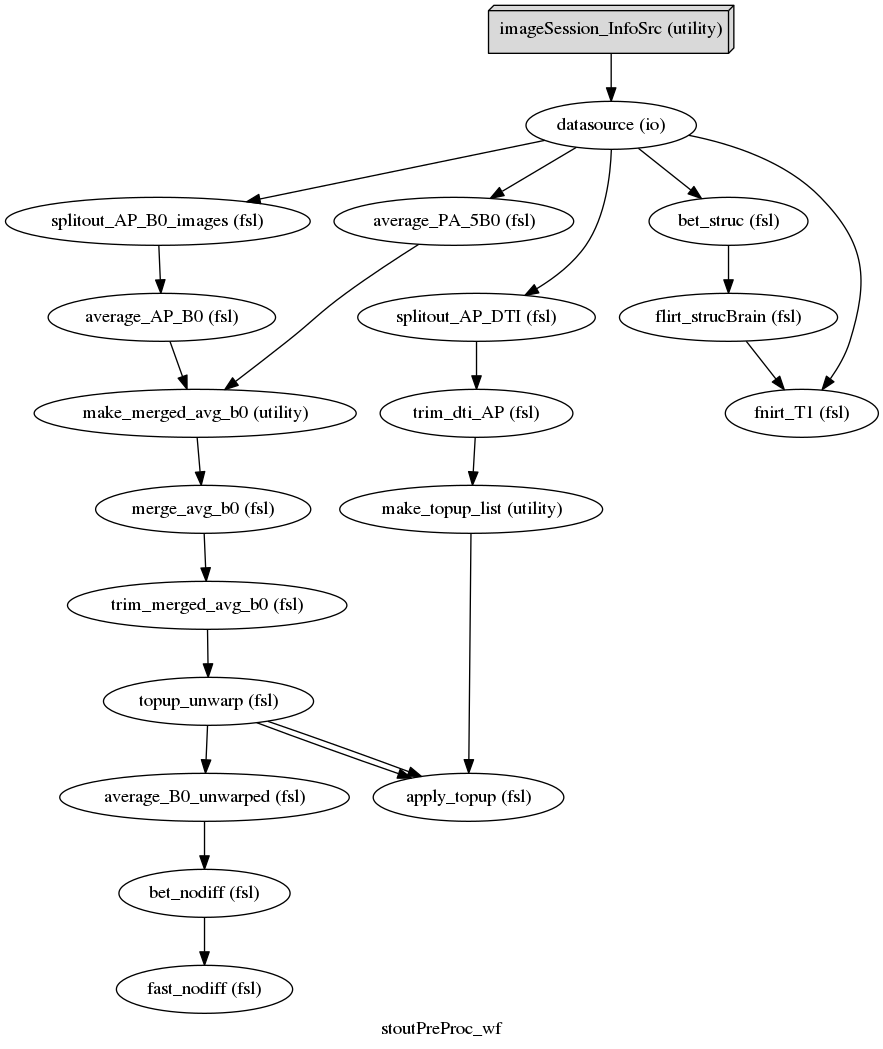

In [17]:
from IPython.display import Image
# stoutPreProc_wf.run(plugin='MultiProc', plugin_args={'n_procs' : 10})
stoutPreProc_wf.write_graph('colored')

Image(filename='/FEATURES/NiPypeWorkingData/StoutHaber/niPypePreProc_rafi/stoutPreProc_wf/colored.png') 

In [22]:

dt_file = stoutPreProc_wf.write_graph(graph2use='colored',simple_form=False)


# workflow.write_graph(graph2use='colored', format='svg', simple_form=True)

# orig shows only the main workflows and omits any subworkflows
# flat shows all workflows, including any subworkflows
# exec shows all workflows, including subworkflows and expands iterables into subgraphs
# hierarchical shows all workflows, including subworkflows and also shows the hierarchical structure
# colored gives


# I just opened an issue on networkx, but in the meantime I found a workaround that I thought worth sharing:
# 1-Install pydotplus (i.e. pip install pidotplus)
# 2-In nipype/pipeline/utils.py replace line 905 nx.write_dot(pklgraph, outfname) by nx.drawing.nx_pydot.write_dot(pklgraph, outfname)
# Now my dot files are generated just fine.

170123-22:18:19,828 workflow INFO:
	 Converting dotfile: /FEATURES/NiPypeWorkingData/StoutHaber/niPypePreProc_rafi/stoutPreProc_wf/graph.dot to png format


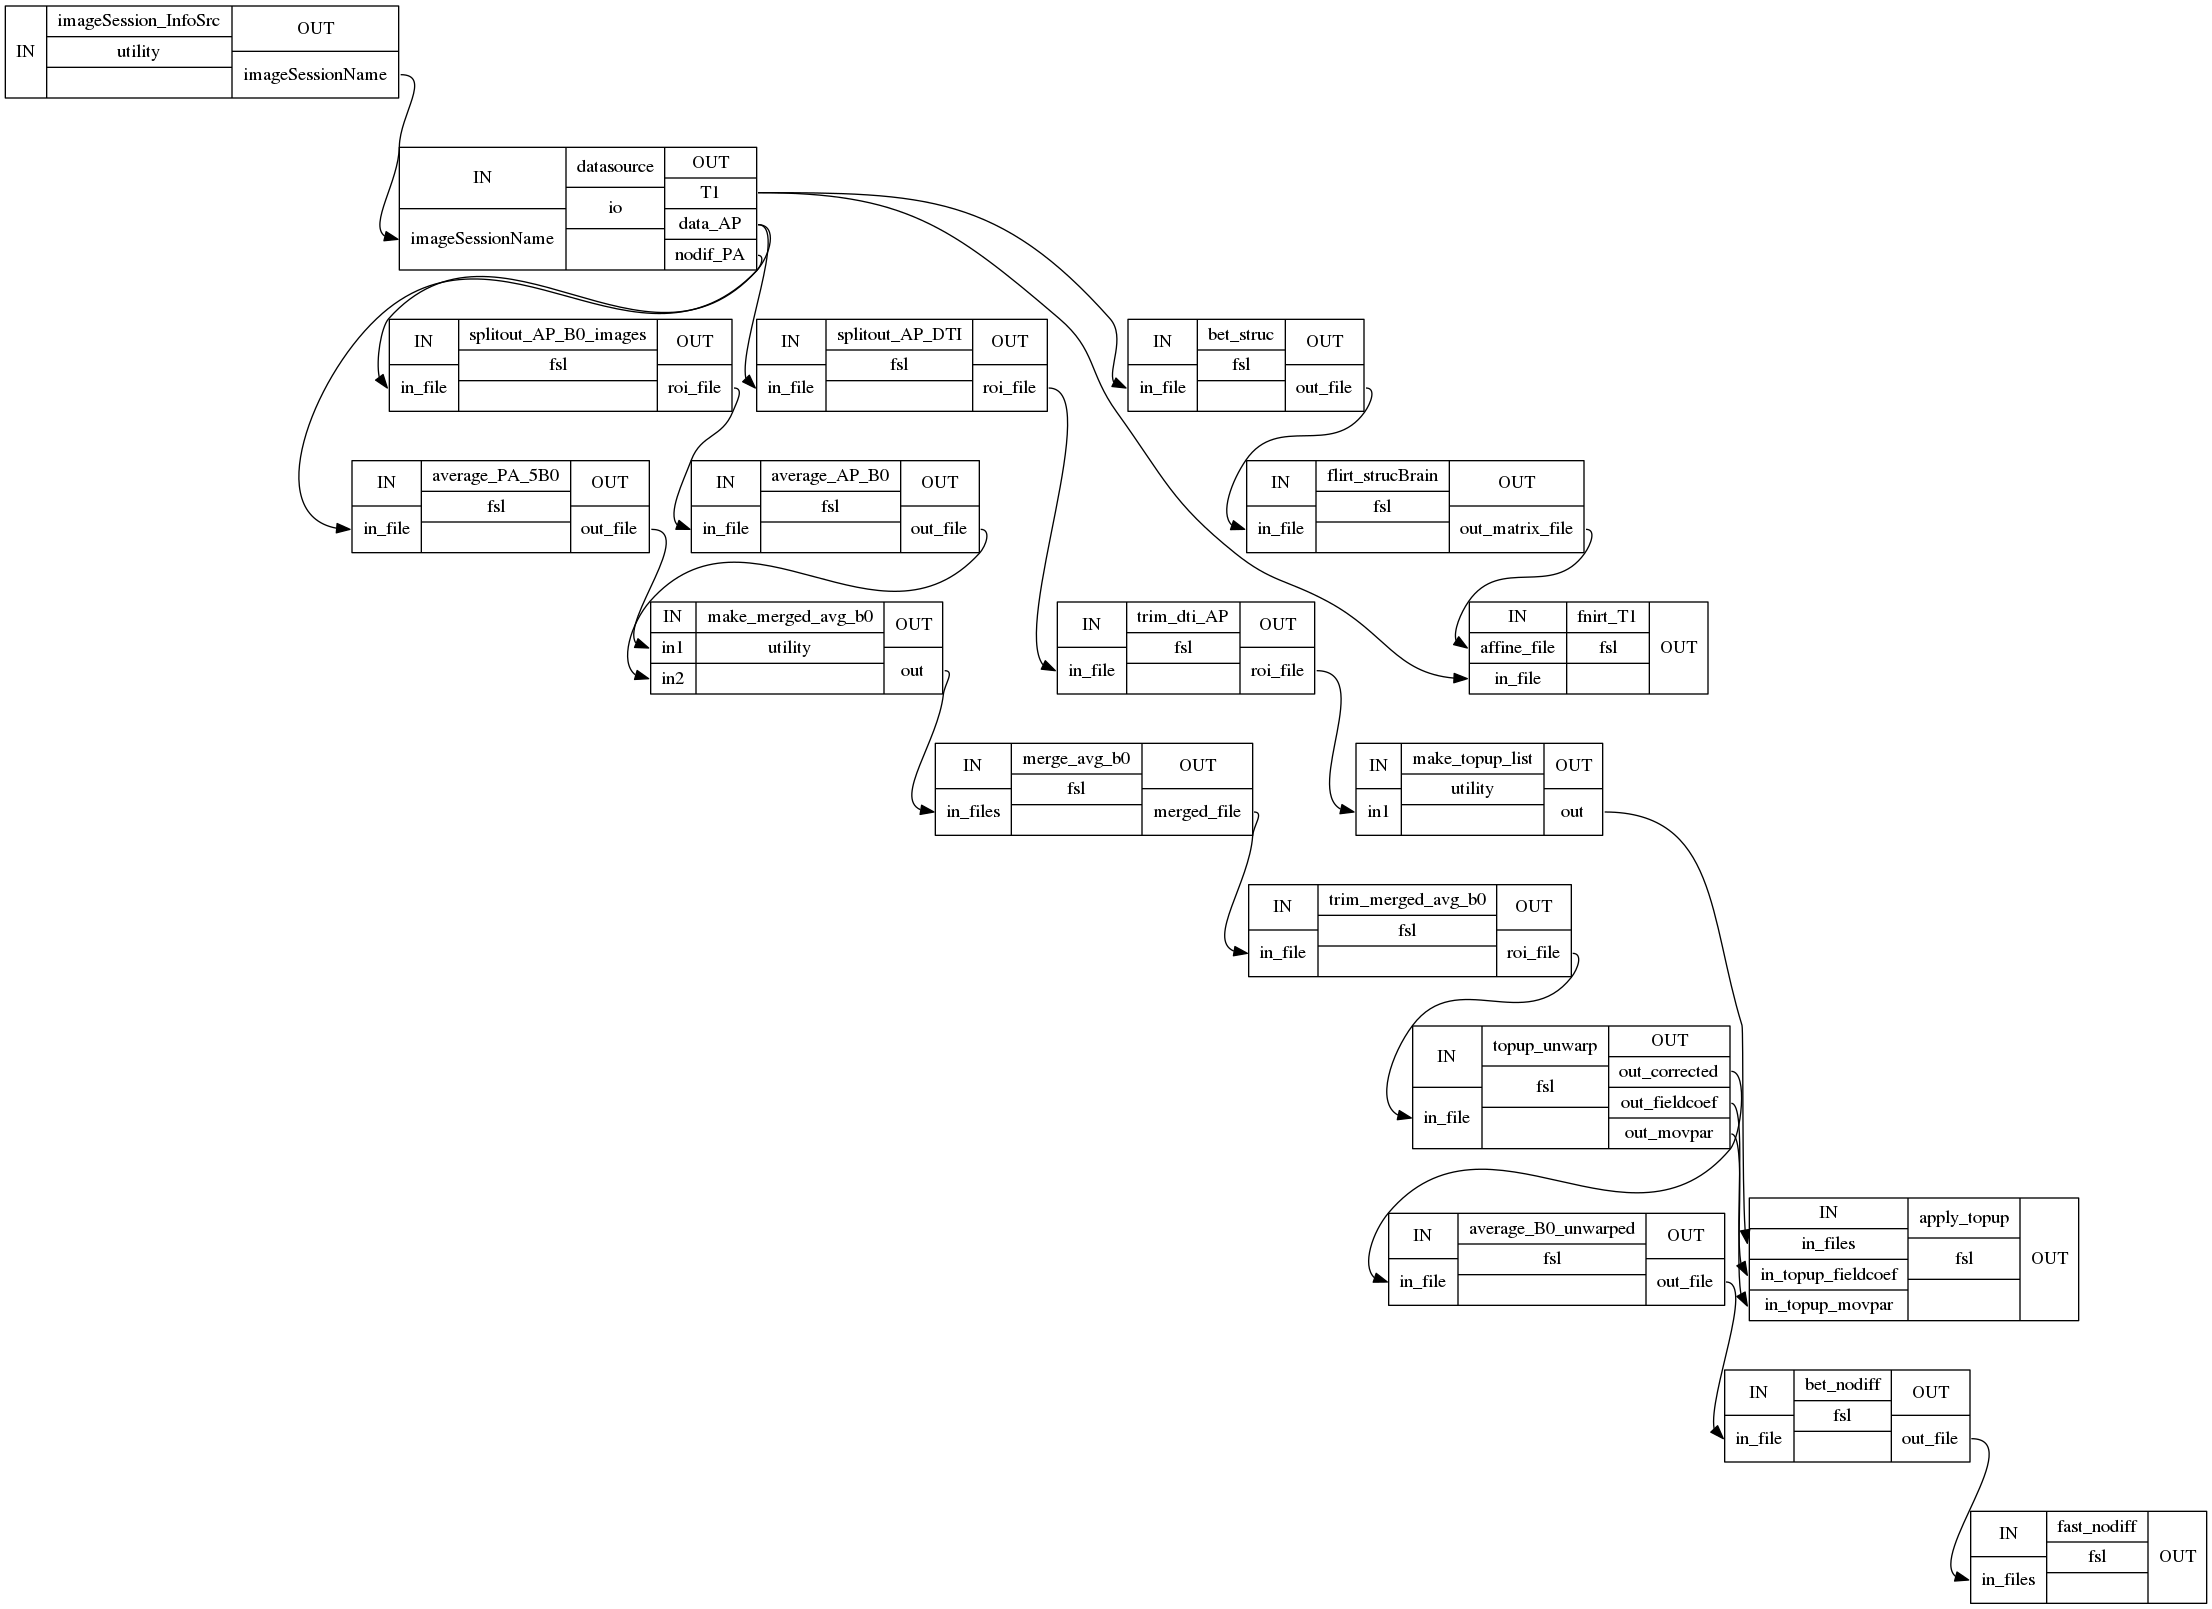

In [25]:
from IPython.display import Image
#Image(filename='/FEATURES/NiPypeWorkingData/StoutHaber/niPypePreProc/stoutPreProc_wf/graph_detailed.dot.png') 

Image(filename='/FEATURES/NiPypeWorkingData/StoutHaber/niPypePreProc_rafi/stoutPreProc_wf/graph_detailed.dot.png')
#Image(filename='/FEATURES/NiPypeWorkingData/StoutHaber/niPypePreProc_rafi/stoutPreProc_wf/graph.dot.png')

In [24]:
stoutPreProc_wf.run(plugin='PBS')

170123-22:18:51,283 workflow INFO:
	 ['check', 'execution', 'logging']


/home/dgutman/anaconda/envs/dag_nipype/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
/home/dgutman/anaconda/envs/dag_nipype/lib/python2.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


170123-22:18:52,84 workflow INFO:
	 Running in parallel.
170123-22:18:52,116 workflow INFO:
	 Submitting 49 jobs
170123-22:18:52,117 workflow INFO:
	 Executing: datasource.a13 ID: 0
170123-22:18:52,572 workflow INFO:
	 Executing: datasource.a34 ID: 8
170123-22:18:52,788 workflow INFO:
	 Executing: datasource.a19 ID: 11
170123-22:18:52,975 workflow INFO:
	 Executing: datasource.a48 ID: 13
170123-22:18:53,136 workflow INFO:
	 Executing: datasource.a42 ID: 17
170123-22:18:53,338 workflow INFO:
	 Executing: datasource.a32 ID: 22
170123-22:18:53,519 workflow INFO:
	 Executing: datasource.a29 ID: 24
170123-22:18:53,756 workflow INFO:
	 Executing: datasource.a33 ID: 28
170123-22:18:53,992 workflow INFO:
	 Executing: datasource.a02 ID: 34
170123-22:18:54,218 workflow INFO:
	 Executing: datasource.a18 ID: 36
170123-22:18:54,380 workflow INFO:
	 Executing: datasource.a01 ID: 44
170123-22:18:54,566 workflow INFO:
	 Executing: datasource.a37 ID: 53
170123-22:18:54,819 workflow INFO:
	 Executing: d

In [ ]:

## merge files
### first file is the output..
$statement  = " fslmerge -t $WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/merged_b0_AP-PA_dti_trim.nii.gz ";
$statement .= " $WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/merged_b0_AP-PA_trim.nii.gz ";
$statement .= " $WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/AP/dti_AP_trim.nii.gz ";
#print "$statement \n";  # will be input for eddy



In [ ]:
make_merged_b0_APPA_dti_trimmed = pe.Node( util.Merge(2), name='make_merged_b0_APPA_dti_trimmed' )



In [ ]:
# topup unwarping
$statement  = " topup ";
$statement .= " --imain=$WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/merged_b0_AP-PA_trim.nii.gz ";
$statement .= " --datain=$WORKINGDATAPATH/acq_params.txt ";
$statement .= " --config=/usr/share/fsl/5.0/etc/flirtsch/b02b0.cnf ";
$statement .= " --out=$WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/topup ";
$statement .= " --fout=$WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/topup_fieldmap "; # can be used for FEAT
$statement .= " --iout=$WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/merged_b0_unwarped.nii.gz ";

In [ ]:
# SplitME = fsl.Split(dimension='t')
# SplitME.inputs.in_file = '/FEATURES/NiPypeWorkingData/StoutHaber/NII_Data_Complete/Subj01_Scan1/DTI/preprocess/AP/data_AP.nii.gz'
# result = SplitME.run()
# print result.outputs.out_files

In [ ]:
#  http://nipype.readthedocs.io/en/latest/interfaces/generated/nipype.interfaces.fsl.maths.html#meanimage

In [ ]:

 
# run topup first, then feed topup output into eddy (the new eddy, not the old eddy_correct)

 

# make merged avg b0
$statement  = " fslmerge -t $WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/merged_b0_AP-PA.nii.gz ";
$statement .= " $WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/AP/avg_b0_AP.nii.gz ";
$statement .= " $WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/5B0_PA/avg_b0_PA.nii.gz ";
#print "$statement \n";
$statement  = " fslroi $WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/merged_b0_AP-PA.nii.gz ";
$statement .= " $WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/merged_b0_AP-PA_trim.nii.gz ";
$statement .= " 0 -1 0 -1 0 110 ";
#print "$statement \n";  # topup needs an even # of slices

$statement  = " fslmerge -t $WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/merged_b0_AP-PA_dti_trim.nii.gz ";
$statement .= " $WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/merged_b0_AP-PA_trim.nii.gz ";
$statement .= " $WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/AP/dti_AP_trim.nii.gz ";
#print "$statement \n";  # will be input for eddy

# topup unwarping
$statement  = " topup ";
$statement .= " --imain=$WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/merged_b0_AP-PA_trim.nii.gz ";
$statement .= " --datain=$WORKINGDATAPATH/acq_params.txt ";
$statement .= " --config=/usr/share/fsl/5.0/etc/flirtsch/b02b0.cnf ";
$statement .= " --out=$WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/topup ";
$statement .= " --fout=$WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/topup_fieldmap "; # can be used for FEAT
$statement .= " --iout=$WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/merged_b0_unwarped.nii.gz ";
#print "$statement \n";
$statement  = " applytopup ";
$statement .= " --method=jac "; # because dti images are only acquired in AP direction; not merging AP+PA
$statement .= " --imain=$WORKINGDATAPATH/" . $subj[$i] . "/DTI/preprocess/AP/dti_AP_trim.nii.gz ";
$statement .= " --inindex=1 "; # because in the merged_b0_AP-PA file used to drive topup, the AP data is first
$statement .= " --datain=$WORKINGDATAPATH/acq_params.txt ";
$statement .= " --topup=$WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/topup ";
$statement .= " --out=$WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/dti_unwarped.nii.gz ";
#print "$statement \n";
    

# make data, nodif, and nodif_brain_mask
$statement  = " fslsplit $WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/merged_b0_unwarped.nii.gz ";
$statement .= " $WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/merged_b0_unwarped_vol -t ";
#print "$statement \n";
$statement  = " fslmaths $WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/merged_b0_unwarped_vol0000 ";
$statement .= " -add $WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/merged_b0_unwarped_vol0001 ";
$statement .= " -div 2 $WORKINGDATAPATH/" .$subj[$i] . "/DTI/data/nodif.nii.gz ";
#print "$statement \n";
$statement  = " bet $WORKINGDATAPATH/" .$subj[$i] . "/DTI/data/nodif.nii.gz ";
$statement .= " $WORKINGDATAPATH/" .$subj[$i] . "/DTI/data/nodif_brain ";
$statement .= " -m -f 0.3 -R";
#print "$statement \n";
$statement  = " fast -B -g -t 2 -o $WORKINGDATAPATH/" . $subj[$i] . "/DTI/data/nodif_brain ";
$statement .= " $WORKINGDATAPATH/" . $subj[$i] . "/DTI/data/nodif_brain.nii.gz ";
#print "$statement \n";
$statement  = " mv $WORKINGDATAPATH/" . $subj[$i] . "/DTI/data/nodif_brain_seg_0.nii.gz ";
$statement .= " $WORKINGDATAPATH/" . $subj[$i] . "/DTI/data/nodif_brain_GM.nii.gz ";
#print "$statement \n";
$statement  = " mv $WORKINGDATAPATH/" . $subj[$i] . "/DTI/data/nodif_brain_seg_1.nii.gz ";
$statement .= " $WORKINGDATAPATH/" . $subj[$i] . "/DTI/data/nodif_brain_WM.nii.gz ";
#print "$statement \n";

# eddy
$statement  = " eddy ";
$statement .= " --imain=$WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/merged_b0_AP-PA_dti_trim.nii.gz ";
$statement .= " --mask=$WORKINGDATAPATH/" .$subj[$i] . "/DTI/data/nodif_brain_mask.nii.gz ";
$statement .= " --index=$WORKINGDATAPATH/eddy_index.txt ";
$statement .= " --acqp=$WORKINGDATAPATH/acq_params.txt ";
$statement .= " --topup=$WORKINGDATAPATH/" .$subj[$i] . "/DTI/preprocess/topup ";
$statement .= " --bvecs=$WORKINGDATAPATH/eddy_bvecs ";
$statement .= " --bvals=$WORKINGDATAPATH/eddy_bvals ";
$statement .= " --out=$WORKINGDATAPATH/" .$subj[$i] . "/DTI/data/data_eddy ";
#print "$statement \n";
$statement  = " fslroi ";
$statement .= " $WORKINGDATAPATH/" .$subj[$i] . "/DTI/data/data_eddy.nii.gz ";
$statement .= " $WORKINGDATAPATH/" .$subj[$i] . "/DTI/data/nodif1.nii.gz ";
$statement .= " 0 1 ";
#print "$statement \n";
$statement  = " fslroi ";
$statement .= " $WORKINGDATAPATH/" .$subj[$i] . "/DTI/data/data_eddy.nii.gz ";
$statement .= " $WORKINGDATAPATH/" .$subj[$i] . "/DTI/data/nodif2.nii.gz ";
    
$statement .= " 1 1 ";
#print "$statement \n";
$statement  = " fslmaths $WORKINGDATAPATH/" .$subj[$i] . "/DTI/data/nodif1.nii.gz ";
$statement .= " -add $WORKINGDATAPATH/" .$subj[$i] . "/DTI/data/nodif2.nii.gz ";
$statement .= " -div 2 $WORKINGDATAPATH/" .$subj[$i] . "/DTI/data/nodif.nii.gz ";
#print "$statement \n";
$statement  = " fslroi ";
$statement .= " $WORKINGDATAPATH/" .$subj[$i] . "/DTI/data/data_eddy.nii.gz ";
$statement .= " $WORKINGDATAPATH/" .$subj[$i] . "/DTI/data/data_dti.nii.gz ";
$statement .= " 2 91 ";
#print "$statement \n";
$statement  = " fslmerge -t $WORKINGDATAPATH/" .$subj[$i] . "/DTI/data/data.nii.gz ";
$statement .= " $WORKINGDATAPATH/" .$subj[$i] . "/DTI/data/nodif.nii.gz ";
$statement .= " $WORKINGDATAPATH/" .$subj[$i] . "/DTI/data/data_dti.nii.gz ";
#print "$statement \n";
    # dtifit
$statement  = " dtifit ";
$statement .= " -k $WORKINGDATAPATH/" .$subj[$i] . "/DTI/data/data.nii.gz ";
$statement .= " -o $WORKINGDATAPATH/" .$subj[$i] . "/DTI/data/data ";
$statement .= " -m $WORKINGDATAPATH/" .$subj[$i] . "/DTI/data/nodif_brain_mask.nii.gz ";
$statement .= " -r $WORKINGDATAPATH/bvecs ";
$statement .= " -b $WORKINGDATAPATH/bvals ";
#print "$statement \n";

# bedpost
$statement  = " cp $WORKINGDATAPATH/bvecs ";
$statement .= " $WORKINGDATAPATH/" .$subj[$i] . "/DTI/data/bvecs ";
#print "$statement \n";
$statement  = " cp $WORKINGDATAPATH/bvals ";
$statement .= " $WORKINGDATAPATH/" .$subj[$i] . "/DTI/data/bvals ";
#print "$statement \n";
$statement  = " bedpostx $WORKINGDATAPATH/" .$subj[$i] . "/DTI/data/";
#print "$statement \n";

# T1 preprocessing
$statement  = " fslreorient2std $WORKINGDATAPATH/" . $subj[$i] . "/T1/struc_raw.nii.gz ";
$statement .= " $WORKINGDATAPATH/" . $subj[$i] . "/T1/struc_raw.nii.gz ";
#print "$statement \n";
$statement  = " bet $WORKINGDATAPATH/" . $subj[$i] . "/T1/struc_raw.nii.gz ";
$statement .= " $WORKINGDATAPATH/" . $subj[$i] . "/T1/struc_brain ";
$statement .= " -m -f 0.4 -g -0.1 -B ";
#print "$statement \n";
$statement  = " fast -B -g -o $WORKINGDATAPATH/" . $subj[$i] . "/T1/struc_brain ";
$statement .= " $WORKINGDATAPATH/" . $subj[$i] . "/T1/struc_brain.nii.gz ";
#print "$statement \n";
$statement  = " mv $WORKINGDATAPATH/" . $subj[$i] . "/T1/struc_brain_restore.nii.gz ";
$statement .= " $WORKINGDATAPATH/" . $subj[$i] . "/T1/struc_brain.nii.gz ";
#print "$statement \n";
$statement  = " mv $WORKINGDATAPATH/" . $subj[$i] . "/T1/struc_brain_seg_1.nii.gz ";
$statement .= " $WORKINGDATAPATH/" . $subj[$i] . "/T1/struc_brain_GM.nii.gz ";
#print "$statement \n";
$statement  = " mv $WORKINGDATAPATH/" . $subj[$i] . "/T1/struc_brain_seg_2.nii.gz ";
$statement .= " $WORKINGDATAPATH/" . $subj[$i] . "/T1/struc_brain_WM.nii.gz ";
#print "$statement \n";
    

## REGISTRATION

$statement  = " mkdir $WORKINGDATAPATH/" . $subj[$i] . "/xfms/ ";
#print "$statement \n";

$statement  = " flirt -dof 12 -in $WORKINGDATAPATH/" . $subj[$i] . "/T1/struc_brain.nii.gz ";
$statement .= " -ref $WORKINGDATAPATH/MNI152_T1_1mm_brain.nii.gz ";
$statement .= " -omat $WORKINGDATAPATH/" . $subj[$i] . "/xfms/struc_12dof_MNI.mat ";
#print "$statement \n";

$statement  = " fnirt --in=$WORKINGDATAPATH/" . $subj[$i] . "/T1/struc_raw.nii.gz ";
$statement .= " --ref=$WORKINGDATAPATH/MNI152_T1_1mm.nii.gz ";
$statement .= " --aff=$WORKINGDATAPATH/" . $subj[$i] . "/xfms/struc_12dof_MNI.mat ";
$statement .= " --cout=$WORKINGDATAPATH/" . $subj[$i] . "/xfms/struc_warp_MNI_warpfield.nii.gz ";
#print "$statement \n";

$statement  = " applywarp --in=$WORKINGDATAPATH/" . $subj[$i] . "/T1/struc_brain.nii.gz ";
$statement .= " --ref=$WORKINGDATAPATH/MNI152_T1_1mm.nii.gz ";
$statement .= " --warp=$WORKINGDATAPATH/" . $subj[$i] . "/xfms/struc_warp_MNI_warpfield.nii.gz ";
$statement .= " --out=$WORKINGDATAPATH/" . $subj[$i] . "/T1/struc_2_MNI.nii.gz ";
#print "$statement \n";

$statement  = " invwarp --warp=$WORKINGDATAPATH/" . $subj[$i] . "/xfms/struc_warp_MNI_warpfield.nii.gz ";
$statement .= " --ref=$WORKINGDATAPATH/" . $subj[$i] . "/T1/struc_brain.nii.gz ";
$statement .= " --out=$WORKINGDATAPATH/" . $subj[$i] . "/xfms/MNI_warp_struc_warpfield.nii.gz ";
#print "$statement \n";

$statement  = " flirt -dof 12 -in $WORKINGDATAPATH/" . $subj[$i] . "/DTI/data/nodif_brain.nii.gz ";
$statement .= " -ref $WORKINGDATAPATH/" . $subj[$i] . "/T1/struc_brain.nii.gz ";
$statement .= " -omat $WORKINGDATAPATH/" . $subj[$i] . "/xfms/nodif_12dof_struc.mat ";
#print "$statement \n";

$statement  = " flirt -in $WORKINGDATAPATH/" . $subj[$i] . "/DTI/data/nodif_brain.nii.gz ";
$statement .= " -ref $WORKINGDATAPATH/" . $subj[$i] . "/T1/struc_brain.nii.gz ";
$statement .= " -applyxfm -init $WORKINGDATAPATH/" . $subj[$i] . "/xfms/nodif_12dof_struc.mat ";
$statement .= " -out $WORKINGDATAPATH/" . $subj[$i] . "/DTI/data/nodif_2_struc.nii.gz ";
#print "$statement \n";

$statement  = " applywarp --in=$WORKINGDATAPATH/" . $subj[$i] . "/DTI/data/nodif_brain.nii.gz ";
$statement .= " --ref=$WORKINGDATAPATH/MNI152_T1_1mm.nii.gz ";
$statement .= " --premat=$WORKINGDATAPATH/" . $subj[$i] . "/xfms/nodif_12dof_struc.mat ";

    $statement .= " --warp=$WORKINGDATAPATH/" . $subj[$i] . "/xfms/struc_warp_MNI_warpfield.nii.gz ";
$statement .= " --out=$WORKINGDATAPATH/" . $subj[$i] . "/DTI/data/nodif_2_MNI.nii.gz ";
#print "$statement \n";

$statement  = " convert_xfm ";
$statement .= " -omat $WORKINGDATAPATH/" . $subj[$i] . "/xfms/struc_12dof_nodif.mat ";
$statement .= " -inverse $WORKINGDATAPATH/" . $subj[$i] . "/xfms/nodif_12dof_struc.mat ";
#print "$statement \n";

$statement  = " convertwarp ";
$statement .= " --ref=$WORKINGDATAPATH/MNI152_T1_1mm_brain.nii.gz ";
$statement .= " --premat=$WORKINGDATAPATH/" . $subj[$i] . "/xfms/nodif_12dof_struc.mat ";
$statement .= " --warp1=$WORKINGDATAPATH/" . $subj[$i] . "/xfms/struc_warp_MNI_warpfield.nii.gz ";
$statement .= " --out=$WORKINGDATAPATH/" . $subj[$i] . "/xfms/nodif_12dof_struc_warp_MNI_warpfield.nii.gz ";
print "$statement \n";

$statement  = " convertwarp ";
$statement .= " --ref=$WORKINGDATAPATH/" . $subj[$i] . "/DTI/data/nodif_brain_mask.nii.gz ";
$statement .= " --warp1=$WORKINGDATAPATH/" . $subj[$i] . "/xfms/MNI_warp_struc_warpfield.nii.gz ";
$statement .= " --postmat=$WORKINGDATAPATH/" . $subj[$i] . "/xfms/struc_12dof_nodif.mat ";
$statement .= " --out=$WORKINGDATAPATH/" . $subj[$i] . "/xfms/MNI_warp_struc_12dof_nodif_warpfield.nii.gz ";
print "$statement \n";

$statement  = " probtrackx2 --pd --onewaycondition --omatrix2 ";
$statement .= " -s $WORKINGDATAPATH/" . $subj[$i] . "/DTI/data.bedpostX/merged ";
$statement .= " -m $WORKINGDATAPATH/" . $subj[$i] . "/DTI/data/nodif_brain_mask.nii.gz ";
$statement .= " -x $WORKINGDATAPATH/ROIs/Human_" . $roi[$r] . "_" . $hemi[$h] . ".nii.gz ";
$statement .= " --target2=$WORKINGDATAPATH/MNI152_T1_1mm_brain_mask_downsample_2.nii.gz ";
$statement .= " -l -c 0.2 -S 2000 --steplength=0.5 -P 5000 --fibthresh=0.1 --randfib=0 ";  # check samples
$statement .= " --xfm=$WORKINGDATAPATH/" . $subj[$i] . "/xfms/MNI_warp_struc_12dof_nodif_warpfield.nii.gz ";
$statement .= " --invxfm=$WORKINGDATAPATH/" . $subj[$i] . "/xfms/nodif_12dof_struc_warp_MNI_warpfield.nii.gz ";
$statement .= " --forcedir --opd ";
$statement .= " --dir=$OUTPUTDATAPATH/" . $subj[$i] . "_" . $roi[$r] . "_" . $hemi[$h] . "_Segmentation  ";
print "$statement \n";

}

In [ ]:
from nipype.interfaces.utility import Function
# get AP avg b0

### I need to get the B0 images which come out of the FSL split and select the first
### several images needed for the average
def getB0images( input_files ):
    """This will return an image stack for merging """
    import os
    b0_Images = []
    b0_image_suffixes = [ 'vol0000.nii.gz','vol0001.nii.gz','vol0002.nii.gz','vol0003.nii.gz','vol0004.nii.gz',
                          'vol0005.nii.gz','vol0006.nii.gz']
    for fwp in input_files: #file w path
        if os.path.basename(fwp) in b0_image_suffixes:
            b0_Images.append(fwp)  ###means I found one of the b0 image files I wanted
    return b0_Images  ### List of images to merge
   
getB0images_interface = Function(input_names=["input_files"], output_names=["b0_image_list"], function=getB0images)

In [ ]:
# def getDiffimages( input_files ):  
#     """This will return an image stack for merging """
#     import os
#     b0_Images = []
#     b0_image_suffixes = [ 'vol0000.nii.gz','vol0001.nii.gz','vol0002.nii.gz','vol0003.nii.gz','vol0004.nii.gz',
#                           'vol0005.nii.gz','vol0006.nii.gz']
#     for fwp in input_files: #file w path
#         if os.path.basename(fwp) in b0_image_suffixes:
#             b0_Images.append(fwp)  ###means I found one of the b0 image files I wanted
#     return b0_Images  ### List of images to merge
   
# getB0images_interface = Function(input_names=["input_files"], output_names=["b0_image_list"], function=getB0images)